# Effects of Wages on Education
_Assignment 1 from Econometrics_

Date: 2019-10-20

In [9]:
defaultW <- getOption("warn")
options(warn = -1)

library(tidyverse)
library(wooldridge)
library(AER)
library(knitr)

# Effects of wages on education

I'll be using the dataset PSID1982 (Cross-section data originating from the Panel Study on Income Dynamics, 1982) from the AER (Applied Econometrics with R) package. This assignment will investigate the effect of eduction on wages for a population.

I'll first investigate the data and the relationships within it, which we'll consider the motivation part of the regression analysis.

The following two tables show the proportion of women and men in the dataset and the proportion of people that reside in a standard metropolitan statistical area. 

In [5]:
data("PSID1982", package = "AER")
prop.table(table(PSID1982$gender)) %>% kable()
prop.table(table(PSID1982$smsa)) %>% kable()



|Var1   |     Freq|
|:------|--------:|
|male   | 0.887395|
|female | 0.112605|



|Var1 |      Freq|
|:----|---------:|
|no   | 0.3579832|
|yes  | 0.6420168|

The following table looks at the correlation between wages, education and experience. 

In [6]:
round(cor(PSID1982 %>% select(wage, education, experience)), 3) %>% kable()



|           |  wage| education| experience|
|:----------|-----:|---------:|----------:|
|wage       | 1.000|     0.441|      0.090|
|education  | 0.441|     1.000|     -0.222|
|experience | 0.090|    -0.222|      1.000|

I will use the dplyr package functions `summarise_all()` and `summarise()` to make calculations, and I'll use functions `gather()` to present the tables in a better way.

The results show that although women and men receive the same amount of education, men get more experience and attain higher wages than women.

In [10]:
PSID1982 %>% 
    select(wage, education, experience) %>% 
    summarise_all(mean) %>% 
    gather(means, values) %>% 
    kable()

PSID1982 %>% 
    select(wage, education, experience, gender) %>% 
    summarise(
        avgeduc=round(mean(education),1), 
        avgexper=round(mean(experience),1), 
        avgwage=round(mean(wage),0), 
        cor_wagvseduc=round(cor(wage,education),3)) %>% 
    gather(mean, wage) %>% 
    kable()

PSID1982 %>% 
    group_by(gender) %>% 
    select(wage, education, experience, gender) %>% 
    summarise(
        avgeduc=round(mean(education),1), 
        avgexper=round(mean(experience),1), 
        avgwage=round(mean(wage),0), 
        cor_wagvseduc=round(cor(wage,education),3)
    ) %>% 
    kable()



|means      |     values|
|:----------|----------:|
|wage       | 1148.03866|
|education  |   12.84538|
|experience |   22.85378|



|mean          |     wage|
|:-------------|--------:|
|avgeduc       |   12.800|
|avgexper      |   22.900|
|avgwage       | 1148.000|
|cor_wagvseduc |    0.441|

`summarise()` ungrouping output (override with `.groups` argument)





|gender | avgeduc| avgexper| avgwage| cor_wagvseduc|
|:------|-------:|--------:|-------:|-------------:|
|male   |    12.8|     23.2|    1200|         0.449|
|female |    12.8|     20.0|     736|         0.671|

# Graphs 

We'll now view the relationships in the data using graphs.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



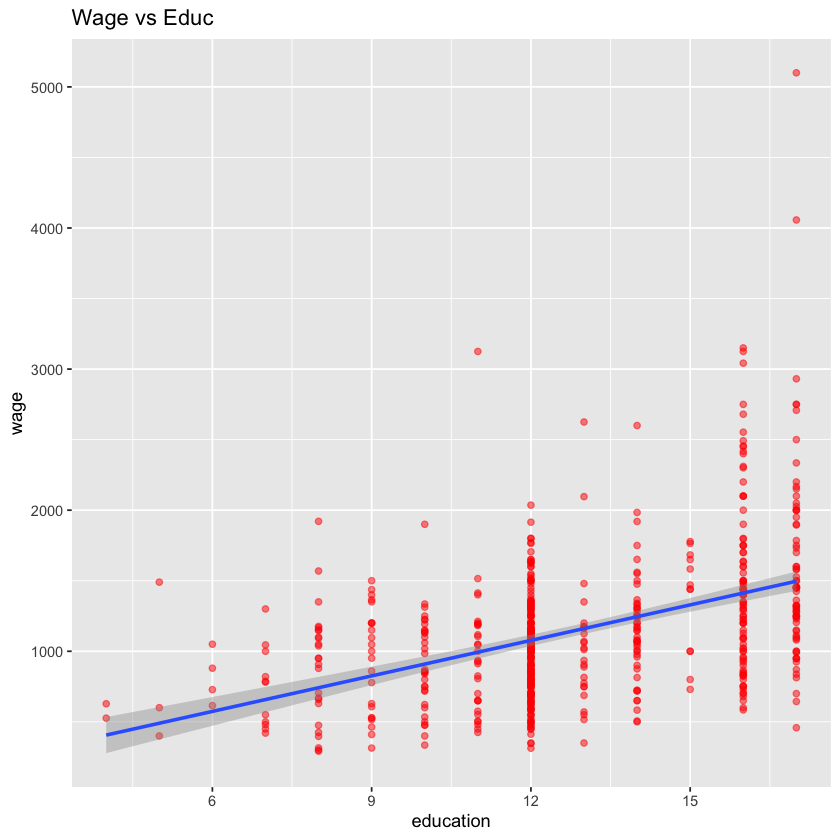

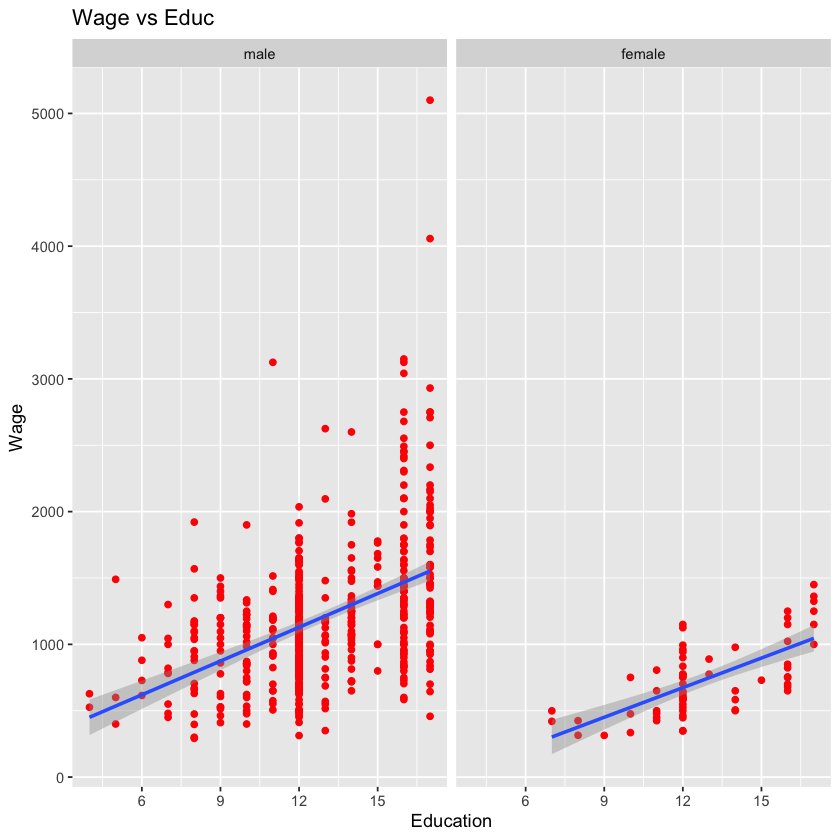

In [11]:
ggplot(PSID1982 , aes(education, wage)) +
    geom_point(color="red", alpha=.5) +
    geom_smooth(method="lm") + 
    ggtitle("Wage vs Educ")

ggplot(PSID1982 , aes(education , wage)) +
    geom_point(color = "red") +
    geom_smooth(method="lm") + 
    facet_grid(~gender)+ 
    ggtitle('Wage vs Educ') +
    xlab('Education') +
    ylab('Wage')

# Simple regression analysis

I will now use the data to estimate the following equation.
$$ wage = \beta_0 + \beta_1*education + u $$

Estimate this equation using the following techniques:

(1) The step by step method
(2) The method the minimizes SSR
(3) The variance-covarance method
(4) Fitting the linear model 

Var(X) = $\frac{\sum_{i=1}^{n} (x_i-\tilde{X})^2}{n-1}$
Cov(X) = $\frac{\sum_{i=1}^{n} (x_i-\tilde{X})(y_i-\tilde{Y})}{n-1}$

## Equation system results: step-by-step

In [12]:
x <- PSID1982$education
y <- PSID1982$wage

(b1<-(sum((x-mean(x))*(y-mean(y))))/(sum((x- mean(x))^2)))
(b0<-mean(y)-b1*mean(x))

[1] 83.88786

[1] 70.46742

## Function minimization results 

In [13]:
dat<-data.frame(x,y)

min.SSR <- function(data, par){sum((y - par[1] - (par[2]*x))^2)}

result<-optim(par=c(b0,b1) , fn=min.SSR, data=dat)

round(result$par,3)

[1] 70.467 83.888

## Covariance-variance method

Using the `cov(x,y)` and `var(x)` functions in R calculate the $\hat\beta_0, \hat\beta_1$ based on the equation below.

$$\hat\beta_1=\frac{Cov(x,y)}{Var(x)}$$ 

$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$

In [14]:
(b1 <- cov(x, y)/var(x))

(b0 <- mean(y) - b1*mean(x))

[1] 83.88786

[1] 70.46742

## lm() command 

Finally, I'll use the lm() command to estimate. I'll save the estimation in an object called reg and show the summary of the model. 

$$ log(wage) = \beta_0 + \beta_1*education + u $$
What can you say about this new results? Why is it better to use $log(wages)$?

I can say that for every additional year of education, wages increase by 0.07174%. It is better to use log(wage) because it is easier to interpret the amount of wage increase as a percentage rather than a monetary amount, where one cannot understand if 83.88 is a big or small wage increase relative to the wage before the increase.

What is your interpretation of the coeficients and the $R^2$?

The intercept (b_0) is the predicted log wage when education is 0. For education (b_1), for every additional year of education, wages increase by 0.07174%. $R^2$ says that education variable explains 20.85% of the variance in log(wage).

In [15]:
(reg <- lm(log(y)~x, dat))

summary(reg) 


Call:
lm(formula = log(y) ~ x, data = dat)

Coefficients:
(Intercept)            x  
    6.02919      0.07174  



Call:
lm(formula = log(y) ~ x, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.14389 -0.25317  0.03051  0.26343  1.28819 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.029191   0.075460    79.9   <2e-16 ***
x           0.071742   0.005741    12.5   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3904 on 593 degrees of freedom
Multiple R-squared:  0.2085,	Adjusted R-squared:  0.2071 
F-statistic: 156.2 on 1 and 593 DF,  p-value: < 2.2e-16
